<a href="https://colab.research.google.com/github/Askoye/IP-Core-Week-7/blob/master/Moringa_Data_Science_Core_W7_Core_Independent_Project_2020_Ted_Askoye_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company: Supervised Learning IP

## 1. Defining the Question

### a) Specifying the Question


> As a Data Scientist,working for Hass Consulting real estate company, I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. I am to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

The metric for success in this project will be to identify a well fitted and accurate regression model that will predict the price of a house given features that it has learned from at its optimum condition.

### c) Understanding the context 

The housing sector in Kenya continues to grow everyday. There is continuous growth in demand for housing as the population increases. With this market growing, many real estate companies have been established, all bringing the housing commodity to the citizens. Housing prices are affected by many factors including, micro economic factors like customers, competitors,suppliers etc.and macro economic factors including demographic, technological, political forces etc. Keeping all this factors constant, this project will focus on predicting the price of houses given its physical features.

### d) Recording the Experimental Design

The main aim of the project is to create a predictive model for house prices for the real estate company Hass consulting. Data cleaning and exploratory data analysis will be done before creating the model and evaluation of the model and a final documentation of the project.

### e) Data Relevance

The data contains football matches in various tornaments since 1872 all the way to 2018, this means the data is time appropriate. The data contains the scores, the ranking, teams, tournament type. The data contains more than 100,000 rows which means its enough for building a model.



## 2. Reading the Data

In [691]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [692]:
# Loading the Dataset

hass_con_df = pd.read_csv('Independent Project Week 7 - house_data.csv')


## 3. Checking the Data

In [693]:
# Previewing the top of the dataset

hass_con_df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [694]:
# Previewing the bottom of the dataset

hass_con_df.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [695]:
# Determining the no. of records in our dataset

print(hass_con_df.shape)

(21613, 20)


In [696]:
# Checking whether each column has an appropriate datatype

hass_con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [697]:
# Converting certain columns to their correct data type which include: -
# id, condition, grade, zipcode, 

renamed_columns = ['id', 'zipcode', 'condition', 'grade']
for i in renamed_columns:
  hass_con_df[i] = hass_con_df[i].astype(str)
  hass_con_df[i]


In [698]:
#Previewing the dataset information

hass_con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  object 
 10  grade          21613 non-null  object 
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  object 
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Below is the dataset glossary:

- Id 
- price  - Price of the house
- bedrooms - Number of Bedrooms
- bathrooms - Number of Bathrooms
- sqft_living - Square feet area of living area
- sqft_lot  - Square feet area of parking Layout
- floors - Number of Floors
- waterfront - Whether waterfront is there or not
- view - Number of Views
- grade - Grades
- sqft_above
- sqft_basement - Square feet area off basement
- yr_built - Year the house is built
- yr_renovated - Year the house is renovated
- zipcode - zipcode os the house
- lat : Latitude of the house
- lon : Longitude of the house
- sqft_living15
- sqft_lot15

## 4. External Data Source Validation

The data sets can be validated from the [Data Source](http://bit.ly/IndependentProjectWeek7Dataset) as a detailed explanation of what the columns is above. By analyzing the data in this site we can verify the data that we have.

## 5. Data Analysis and Preparation

### Tidying the Dataset

In [699]:
# Checking for duplicates.
hass_con_df.duplicated().sum()

# 3 duplicates were detected.

3

In [700]:
# Dropping the duplicates.

hass_con_df.drop_duplicates(keep=False,inplace=True) 


In [701]:
# Checking if the duplicates are dropped.
hass_con_df.duplicated().sum()

# All duplicates have been dropped.

0

In [702]:
# Identifying the Missing Data

hass_con_df.isnull().sum().any()

# There is no missing data.

False

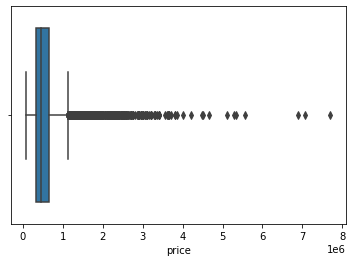

In [703]:
# Checking for Outliers

sns.boxplot(x = hass_con_df['price'])

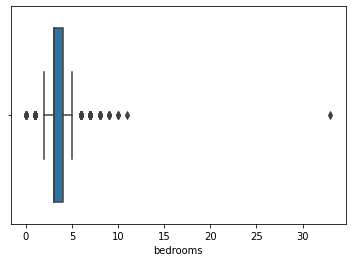

In [704]:
sns.boxplot(x = hass_con_df['bedrooms'])

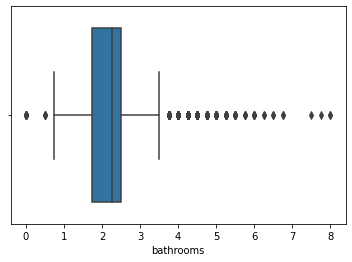

In [705]:
sns.boxplot(x = hass_con_df['bathrooms'])

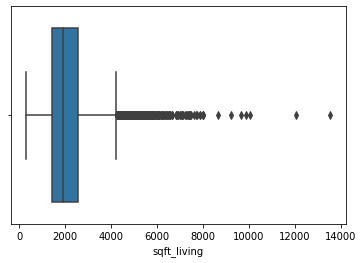

In [706]:
sns.boxplot(x = hass_con_df['sqft_living'])

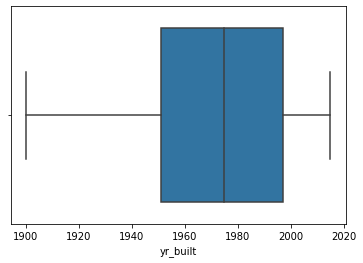

In [707]:
sns.boxplot(x = hass_con_df['yr_built'])

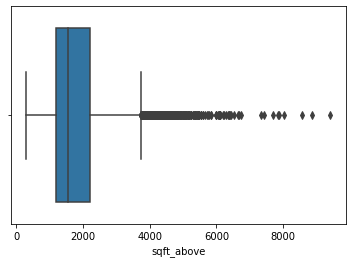

In [708]:
sns.boxplot(x = hass_con_df['sqft_above'])

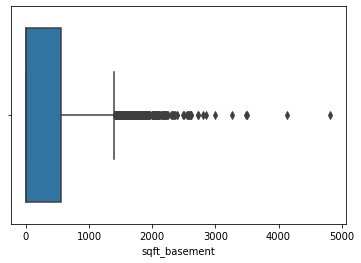

In [709]:
sns.boxplot(x = hass_con_df['sqft_basement'])

We can see from our boxplots that most of the variables have outliers which we will consider apart from some extreme outliers in the bedroom column

In [710]:
# View the row that has the outlier 

outlier = hass_con_df[hass_con_df["bedrooms"] >= 30]
outlier

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
15870  2402100895  640000.0        33  ... -122.331           1330        4700

[1 rows x 20 columns]

In [711]:
# Dropping the row by index

hass_con_df = hass_con_df.drop(hass_con_df.index[15870])


In [712]:
# Confirm the index row has been deleted.

hass_con_df.shape

(21606, 20)

# 6. Exploratory Data Analysis

## Univariate analysis

In [841]:
import pandas_profiling 
from pandas_profiling import ProfileReport

ProfileReport(hass_con_df)

From the Pandas Profile report,

We can see that,

Some variables such as view, waterfont, year_renovated have very low cardinality and hence are not good for machine learning. These variables can be dropped before machine learning.



In [714]:
hass_con_df.drop(columns=['view','waterfront','yr_renovated','yr_built','sqft_basement'],inplace=True)

## Bivariate analsis

In [715]:
#Correlation matrix.

hass_con_matrix = hass_con_df.corr()
hass_con_matrix

price  bedrooms  ...  sqft_living15  sqft_lot15
price          1.000000  0.308468  ...       0.585284    0.082442
bedrooms       0.308468  1.000000  ...       0.391707    0.029226
bathrooms      0.525224  0.515992  ...       0.568736    0.087205
sqft_living    0.702028  0.576732  ...       0.756394    0.183277
sqft_lot       0.089652  0.031699  ...       0.144628    0.718555
floors         0.256977  0.175454  ...       0.279959   -0.011221
sqft_above     0.605668  0.477642  ...       0.731928    0.194068
lat            0.306820 -0.008951  ...       0.048699   -0.086446
long           0.021614  0.129468  ...       0.334647    0.254504
sqft_living15  0.585284  0.391707  ...       1.000000    0.183191
sqft_lot15     0.082442  0.029226  ...       0.183191    1.000000

[11 rows x 11 columns]

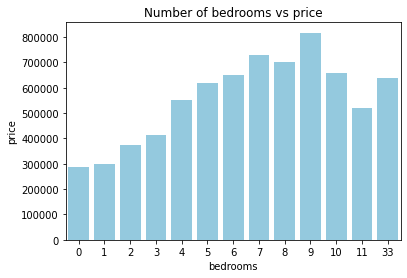

In [716]:
# Barplot of bedrooms vs price

ax = sns.barplot(x = 'bedrooms', y = 'price', data=hass_con_df, ci=None, color='skyblue' ,estimator=np.median)
ax.set(xlabel='bedrooms',
       ylabel='price',
       title='Number of bedrooms vs price')
plt.show()


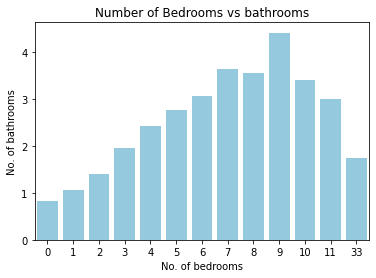

In [717]:
# Barplot of bedroom vs Bathroom

ax = sns.barplot(x = 'bedrooms', y = 'bathrooms', color = 'skyblue', data=hass_con_df, ci=None)
ax.set(xlabel='No. of bedrooms',
       ylabel='No. of bathrooms',
       title='Number of Bedrooms vs bathrooms')
plt.show()

The figures above show that as the number of bedrooms increase, we have a gradual increase in price as well as the number of bathrooms . This happens upto a certain point and then starts decreasing.

## Multivariate analysis

In [718]:
# We will begin by previewing the data.

hass_con_df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 15 columns]

In [719]:
corr = hass_con_df.corr()
corr

price  bedrooms  ...  sqft_living15  sqft_lot15
price          1.000000  0.308468  ...       0.585284    0.082442
bedrooms       0.308468  1.000000  ...       0.391707    0.029226
bathrooms      0.525224  0.515992  ...       0.568736    0.087205
sqft_living    0.702028  0.576732  ...       0.756394    0.183277
sqft_lot       0.089652  0.031699  ...       0.144628    0.718555
floors         0.256977  0.175454  ...       0.279959   -0.011221
sqft_above     0.605668  0.477642  ...       0.731928    0.194068
lat            0.306820 -0.008951  ...       0.048699   -0.086446
long           0.021614  0.129468  ...       0.334647    0.254504
sqft_living15  0.585284  0.391707  ...       1.000000    0.183191
sqft_lot15     0.082442  0.029226  ...       0.183191    1.000000

[11 rows x 11 columns]

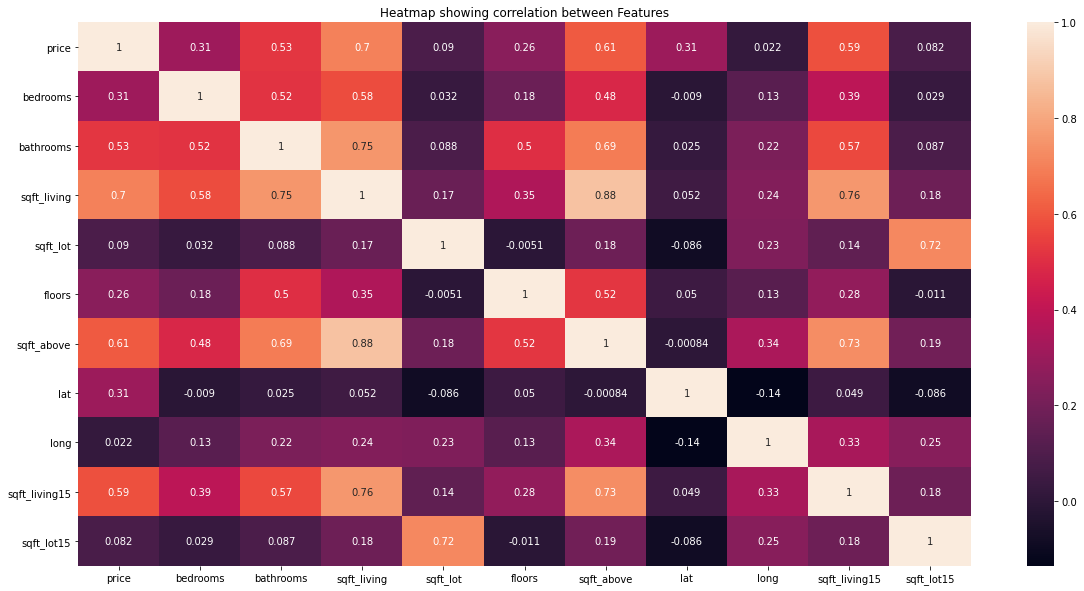

In [720]:
# Checking for correlations between features via a Heatmap

plt.figure(figsize = (20, 10))
sns.heatmap(hass_con_df.corr(), annot = True) 
plt.title('Heatmap showing correlation between Features')
plt.show()

From the heatmap above, some variables are seen to have high correlation with other variables.

These include: 
- sqft_living and sqft_living15, 
- sqft_lot and sqft_lot15, 
- sqft_living15 and sqft_above, 
- sqft_living and sqft_above, 
- sqft_living and bathrooms. 


To reduce this high correlation we will drop some columns such as
sqft_living15, sqft_lot15, sqft_above,sqft_basement, bathrooms and other irrelevant columns such as long, grade, lat and floors


In [721]:
# Find the correlation of the variables

correlation=hass_con_df.corr()
correlation

price  bedrooms  ...  sqft_living15  sqft_lot15
price          1.000000  0.308468  ...       0.585284    0.082442
bedrooms       0.308468  1.000000  ...       0.391707    0.029226
bathrooms      0.525224  0.515992  ...       0.568736    0.087205
sqft_living    0.702028  0.576732  ...       0.756394    0.183277
sqft_lot       0.089652  0.031699  ...       0.144628    0.718555
floors         0.256977  0.175454  ...       0.279959   -0.011221
sqft_above     0.605668  0.477642  ...       0.731928    0.194068
lat            0.306820 -0.008951  ...       0.048699   -0.086446
long           0.021614  0.129468  ...       0.334647    0.254504
sqft_living15  0.585284  0.391707  ...       1.000000    0.183191
sqft_lot15     0.082442  0.029226  ...       0.183191    1.000000

[11 rows x 11 columns]

In [722]:
# We'll use this correlations above to compute VIF(Variance Inflation Factor)
# create a new data frame with the inverse of the matrix above

#Compute the variation inflation factor
vif = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
vif

price  bedrooms  ...  sqft_living15  sqft_lot15
price          2.510855  0.317690  ...      -0.396067    0.074619
bedrooms       0.317690  1.618049  ...       0.096038    0.091752
bathrooms     -0.116217 -0.368916  ...      -0.023871    0.067529
sqft_living   -1.530555 -1.073416  ...      -1.101405   -0.161118
sqft_lot      -0.073908  0.044009  ...       0.149971   -1.459680
floors         0.058340  0.146290  ...       0.174553    0.077784
sqft_above    -0.124022  0.048445  ...      -0.729918   -0.044338
lat           -0.616439 -0.014952  ...      -0.009759    0.025606
long           0.380526  0.021230  ...      -0.401362   -0.150116
sqft_living15 -0.396067  0.096038  ...       2.660681   -0.116469
sqft_lot15     0.074619  0.091752  ...      -0.116469    2.134900

[11 rows x 11 columns]

Some of the variables in the dataset have VIF of above 5 suggesting they have high multicolinearity and as such we will drop them



In [723]:
hass_con_df = hass_con_df.drop(['sqft_living','sqft_above',], axis = 1)
hass_con_df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 13 columns]

We'll now check our VIF and see if the selected columns where dropped and changes effected


In [724]:
correlation = hass_con_df.corr()
correlation

price  bedrooms  ...  sqft_living15  sqft_lot15
price          1.000000  0.308468  ...       0.585284    0.082442
bedrooms       0.308468  1.000000  ...       0.391707    0.029226
bathrooms      0.525224  0.515992  ...       0.568736    0.087205
sqft_lot       0.089652  0.031699  ...       0.144628    0.718555
floors         0.256977  0.175454  ...       0.279959   -0.011221
lat            0.306820 -0.008951  ...       0.048699   -0.086446
long           0.021614  0.129468  ...       0.334647    0.254504
sqft_living15  0.585284  0.391707  ...       1.000000    0.183191
sqft_lot15     0.082442  0.029226  ...       0.183191    1.000000

[9 rows x 9 columns]

In [725]:
# Computing the VIF
vif = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
vif

price  bedrooms  ...  sqft_living15  sqft_lot15
price          2.007937 -0.001735  ...      -0.915432    0.013990
bedrooms      -0.001735  1.412695  ...      -0.222132    0.053815
bathrooms     -0.599204 -0.690386  ...      -0.453095    0.012698
sqft_lot      -0.129807  0.010216  ...       0.084154   -1.466814
floors         0.022125  0.157169  ...      -0.023131    0.065592
lat           -0.520370  0.040773  ...       0.114488    0.038410
long           0.349753  0.015268  ...      -0.497402   -0.156964
sqft_living15 -0.915432 -0.222132  ...       2.068974   -0.181784
sqft_lot15     0.013990  0.053815  ...      -0.181784    2.127458

[9 rows x 9 columns]

Testing to see if we have any variables with a VIF over 5

In [726]:
value= vif.values
(value > 5).any()

False

All the variables have VIF of less than 5 hence can be used for prediction.

### Feature Engineering

In [741]:
# Feature Engineering
# Data Preprocessing
# Separating features and labels 
# Select the attributes and the label

X = hass_con_df[['bedrooms', 'bathrooms', 'floors','condition', 'grade',
       'sqft_living15', 'sqft_lot15']].values
y = np.log(hass_con_df['price'])

In [742]:
# Split the data into a training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


In [743]:
# Normalization

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [744]:
# Applying PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# 7. Implementing the Solution

## Multiple Linear Regression

In [745]:
# Features:
# Variables with low cardinality and those with no much useful information to be dropped. 
X = hass_con_df.drop(['id', 'price', 'lat', 'long', 'zipcode','floors'], 1)
print (X.columns)

# Label:
y = hass_con_df['price']

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'condition', 'grade',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [746]:
# Ensuring assumptions of multivariate collinearity are met.
mr = X.corr()
mr

bedrooms  bathrooms  sqft_lot  sqft_living15  sqft_lot15
bedrooms       1.000000   0.515992  0.031699       0.391707    0.029226
bathrooms      0.515992   1.000000  0.087759       0.568736    0.087205
sqft_lot       0.031699   0.087759  1.000000       0.144628    0.718555
sqft_living15  0.391707   0.568736  0.144628       1.000000    0.183191
sqft_lot15     0.029226   0.087205  0.718555       0.183191    1.000000

No Multicolinearity

Assumptions of linear regression have been checked and now we can do modelling.

In [748]:
# Dividing our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [749]:
#  Training the Algorithm

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [750]:
# Printing out the intercept and the coefficients.

print (regressor.intercept_ )

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

-1161193.3297482543


Coefficient
bedrooms          730.506228
bathrooms       50654.971811
sqft_lot            0.229972
condition       78503.692397
grade          143936.264847
sqft_living15     113.036450
sqft_lot15         -0.552282

In [752]:
# Making Predictions

y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values

X_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
X_result


Actual      Predicted
6740   1880000.0  879427.055999
2778    560000.0  602179.934393
10872   175000.0  101476.220733
12131   219950.0  333205.372434
8783    880000.0  950301.561465
...          ...            ...
19862   550000.0  568575.087075
13530   229999.0  432485.925256
19650   155000.0  279285.266907
5623    500000.0  647032.217080
10933   324000.0  393248.571397

[4322 rows x 2 columns]

In [753]:
# Evaluating the Algorithm


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 169358.25573295006
Mean Squared Error: 74277751785.63472
Root Mean Squared Error: 272539.44996208296


In [754]:
a = r2_score(y_test, y_pred)
a

0.48862728575781844

### Checking for heteroskedasticity

#### Residual plot.

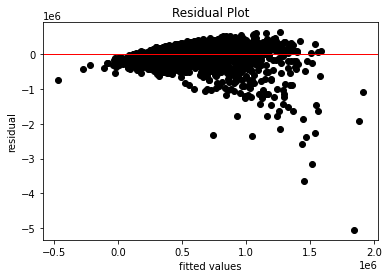

In [755]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value

residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

#### Bartlett's test

In [756]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



4710.241309846068
the variances are homogeneous!


## Quantile regression

In [812]:
#Separating training and testing datasets
B = X.drop(['condition', 'grade'], 1) 
y = hass_con_df['price']

B_train, B_test, y_train_b, y_test_b = train_test_split(B,y, test_size=0.2, random_state=24)


In [813]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ B', hass_con_df)
res = mod.fit(q=.5)

  # Then print out the summary of our model
  #
print(res.summary())
  

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2197
Model:                       QuantReg   Bandwidth:                   3.146e+04
Method:                 Least Squares   Sparsity:                    4.255e+05
Date:                Fri, 31 Jul 2020   No. Observations:                21606
Time:                        20:30:08   Df Residuals:                    21600
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.496e+04   5935.148     -7.575      0.000   -5.66e+04   -3.33e+04
B[0]       -2242.2756   1835.955     -1.221      0.222   -5840.883    1356.332
B[1]        7.614e+04   2479.014     30.715      0.000    7.13e+04     8.1e+04
B[2]           0.3154      0.050      6.274      0.0

In [814]:
# Making Predictions

y_pred_b = res.predict(B)

# To compare the actual output values for X_test with the predicted values

B1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred_b})
B1


Actual      Predicted
0      221900.0  284037.981452
1      538000.0  446731.638696
2      180000.0  555287.718883
3      604000.0  438186.195168
4      510000.0  449499.780087
...         ...            ...
21608  360000.0  436487.850547
21609  400000.0  490655.734385
21610  402101.0  205766.582506
21611  400000.0  413619.288032
21612  325000.0  206088.795106

[21606 rows x 2 columns]

In [815]:
# Evaluating the Algorithm


print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_b))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_b))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_b)))


Mean Absolute Error: 173151.5162507968
Mean Squared Error: 87385941278.49643
Root Mean Squared Error: 295611.1318582175


In [816]:
b = r2_score(y, y_pred_b)
b

0.352410265995723

## Ridge regression

### Model creation

Ridge regression deals with multicollinearity hence no need to drop the variable that are correlated

In [817]:
# identifying features and labels.
C =  hass_con_df.drop(['id', 'price', 'lat', 'long', 'zipcode'], 1)
print (C.columns)

y = hass_con_df['price']

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [818]:
# Splitting the dataset into training and testing sets
#
C_train, C_test, y_train_c, y_test_c = train_test_split(D, y, test_size = 0.25, random_state = 35)

In [820]:
# Training the model
#
ridge = Ridge(normalize=True)
ridge.fit(C_train, y_train_c)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [821]:
# Making predictions
#
y_pred_c = ridge.predict(C_test)

# To compare the actual output values for X_test with the predicted values
# 
C1 = pd.DataFrame({'Actual': y_test_c, 'Predicted': y_pred_c})
C1


Actual      Predicted
6740   1880000.0  756468.961365
2778    560000.0  612413.272175
10872   175000.0  223731.683810
12131   219950.0  391206.846497
8783    880000.0  841823.372402
...          ...            ...
21609   400000.0  579186.838383
19817   395825.0  519629.957025
1384    433500.0  392749.443868
2597    352500.0  538357.151191
3056    575000.0  407266.161364

[5402 rows x 2 columns]

In [822]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_c, y_pred_c))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_c, y_pred_c))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_c, y_pred_c)))


Mean Absolute Error: 166251.4158700791
Mean Squared Error: 79201658703.1021
Root Mean Squared Error: 281427.89254638937


In [823]:
from sklearn.metrics import r2_score
r2_score(y_test_c, y_pred_c)

0.4269525680524485

### Hyperparameter tuning for optimal parameters

In [824]:
ridge=Ridge(normalize=True)
search=GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

In [825]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(C,y)
print (search.best_params_)
abs(search.best_score_)

{'alpha': 0.001}


68105543649.17375

### Training the model with optimal parameters

In [826]:
# Training the model with the optimal alpha value
#
ridge = Ridge(normalize=True, alpha = 0.01 )
ridge.fit(C_train, y_train_c)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [827]:
# Making predictions
#
y_pred_c = ridge.predict(C_test)

# To compare the actual output values for X_test with the predicted values
# 
C2 = pd.DataFrame({'Actual': y_test_c, 'Predicted': y_pred_c})
C2

Actual      Predicted
6740   1880000.0  888506.673758
2778    560000.0  608677.280297
10872   175000.0  108299.390188
12131   219950.0  345239.602453
8783    880000.0  941212.735470
...          ...            ...
21609   400000.0  552786.792051
19817   395825.0  529092.463902
1384    433500.0  389056.991333
2597    352500.0  585788.665678
3056    575000.0  363345.376384

[5402 rows x 2 columns]

In [828]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_c, y_pred_c))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_c, y_pred_c))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_c, y_pred_c)))


Mean Absolute Error: 167895.55059666728
Mean Squared Error: 69858368452.36272
Root Mean Squared Error: 264307.33711413067


In [829]:
from sklearn.metrics import r2_score
c = r2_score(y_test, y_pred)
c

0.48918385200709846

### Performing cross validation

In [831]:
# Performing cross validation of ten folds

scores = cross_val_score(ridge, C, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores

print('Mean of cross validation scores is', {np.sqrt(np.round(scores.mean()*-1, 3))})

# Calculating the variance of the cross validation scores from the mean
#
print('Standard deviation of the cross validation scores is',{np.round(scores.std(), 3)})

Mean of cross validation scores is {260972.787538634}
Standard deviation of the cross validation scores is {9756994956.062}


### Checking for heterskedasticity

#### Residual plot

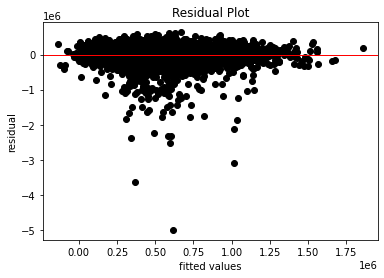

In [832]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred_c, y_test_c)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

#### Bartlett's test

In [833]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_c, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



5683.669799021783
the variances are homogeneous!


## Lasso regression

Lasso regression deals with multicollinearity hence no need to drop the variable that are correlated

### Model Creation

In [834]:
# Identifying features and labels.
D =  X.drop(['sqft_living15', 'sqft_lot15', 'bathrooms'], axis=1)

y = hass_con_df['price']


In [837]:
# Splitting the dataset into training and testing sets

D_train, D_test, y_train_d, y_test_d = train_test_split(D, y, test_size = 0.25, random_state = 35)

In [838]:
# Training the model

lasso = Lasso(normalize=True)
lasso.fit(D_train, y_train_d)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [840]:
# Making predictions

y_pred_d = lasso.predict(D_test)

# To compare the actual output values for X_test with the predicted values

D1 = pd.DataFrame({'Actual': np.round(y_test_d), 'Predicted': np.round(y_pred_d)})
D1


Actual  Predicted
6740   1880000.0  1005928.0
2778    560000.0   568101.0
10872   175000.0   131128.0
12131   219950.0   363928.0
8783    880000.0   879633.0
...          ...        ...
21609   400000.0   595730.0
19817   395825.0   540397.0
1384    433500.0   437415.0
2597    352500.0   571354.0
3056    575000.0   363384.0

[5402 rows x 2 columns]

In [783]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 172666.11889015784
Mean Squared Error: 74433534242.55362
Root Mean Squared Error: 272825.09826361947


In [784]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.45685036914480903

### Hyperparameter tuning for optimal parameters

In [785]:
lasso=Lasso(normalize=True)
search=GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

In [786]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
 
search.fit(P,y)
print (search.best_params_)
abs(search.best_score_)

{'alpha': 0.1}


71990038744.64493

### Training model with optimal parameters

In [787]:
# Training the model with the optimal alpha value
#
lasso = Lasso(normalize=True, alpha =1e-05 )
lasso.fit(P_train, y_train)


Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [788]:
# Making predictions
#
y_pred = lasso.predict(P_test)
y_pred

# To compare the actual output values for P_test with the predicted values
# 
P2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
P2

Actual      Predicted
19829  610360.0  802835.391491
12527  625000.0  849378.048155
1611   378000.0  391394.111940
21369  455950.0  596676.345033
18250  498000.0  362626.818529
...         ...            ...
7655   702000.0  391785.005878
20774  479950.0  775434.474918
11161  422250.0  717793.134929
16203  439950.0  643606.391745
10371  581000.0  409275.152507

[5402 rows x 2 columns]

In [789]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 172694.98263958705
Mean Squared Error: 74435204526.64618
Root Mean Squared Error: 272828.1593359567


In [790]:
from sklearn.metrics import r2_score
d = r2_score(y_test, y_pred)
d

0.4568381808993156

### Perfoming cross validation

In [791]:
# Performing cross validation of ten folds
#
scores = cross_val_score(lasso, P, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 268309.60279154935
Standard deviation of the cross validation scores is 10143839039.549


### Checking for heteroskedasticity

#### Residual plot

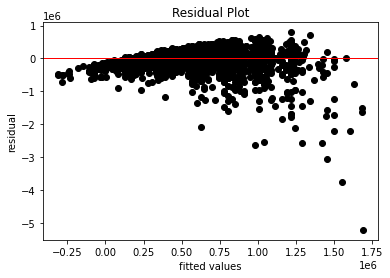

In [792]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

#### Bartlett's test

In [793]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



6047.542445020408
the variances are homogeneous!


## Elastic Net Regression

### Model Creation

In [796]:
# identifying features and labels.
M = hass_con_df.drop(['id', 'price','lat', 'long', 'zipcode'], 1)
M.columns

y = hass_con_df['price']


In [797]:
# Splitting the dataset into training and testing sets
#
M_train, M_test, y_train, y_test = train_test_split(M, y, test_size = 0.25, random_state = 101)

In [798]:
# Training the model
#
elastic = ElasticNet(normalize=True)
elastic.fit(M_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [799]:
# Making predictions
#
y_pred = elastic.predict(M_test)

# To compare the actual output values for X_test with the predicted values
# 
M1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
M1


Actual      Predicted
19829  610360.0  539893.716970
12527  625000.0  539761.899422
1611   378000.0  539770.458812
21369  455950.0  539837.423529
18250  498000.0  539796.212071
...         ...            ...
7655   702000.0  539846.776536
20774  479950.0  539826.496064
11161  422250.0  539798.179948
16203  439950.0  539813.344276
10371  581000.0  539700.821329

[5402 rows x 2 columns]

In [800]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 234745.139337687
Mean Squared Error: 137000766719.91469
Root Mean Squared Error: 370136.146194768


In [801]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.00029043860369948327

### Hyperparameter tuning for optimal parameters

In [802]:
elastic = ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

In [803]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(M,y)
print (search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05}


68439654258.69676

### Training the model with optiml parameters

In [804]:
# Training the model with the optimal alpha value
#
elastic = ElasticNet(normalize=True, alpha =1e-05)
elastic.fit(M_train, y_train)


ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [805]:
# Making predictions
#
y_pred = elastic.predict(M_test)

# To compare the actual output values for X_test with the predicted values
# 
M2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
M2

Actual      Predicted
19829  610360.0  788693.022231
12527  625000.0  630666.711941
1611   378000.0  396805.487997
21369  455950.0  571475.234041
18250  498000.0  437667.404343
...         ...            ...
7655   702000.0  531814.191930
20774  479950.0  733519.522964
11161  422250.0  631829.043924
16203  439950.0  600661.154431
10371  581000.0  380921.001206

[5402 rows x 2 columns]

In [806]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 166371.7882253842
Mean Squared Error: 70002535366.56822
Root Mean Squared Error: 264579.92245551856


In [807]:
from sklearn.metrics import r2_score
e = r2_score(y_test, y_pred)
e

0.48918385200709846

### Performing cross validation

In [808]:
# Performing cross validation of ten folds
#
scores = cross_val_score(elastic, M, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 261609.73655179006
Standard deviation of the cross validation scores is 10116713985.596


### Checking for heteroskedasticity

#### Residual plot

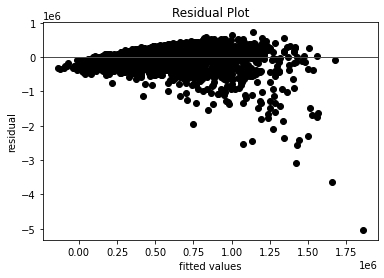

In [809]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

#### Bartlett's test

In [810]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



5974.098444071629
the variances are homogeneous!


# Conclusion

In [811]:
#Models vs r2 score.
models = ['multivariate', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [a,b,c,d,e]
conc = pd.DataFrame({'models': models, 'r2_scores': r2_scores})
conc

models  r2_scores
0  multivariate   0.488627
1      quantile   0.352410
2         ridge   0.494554
3         lasso   0.456838
4       elastic   0.489184

Most of the models have an r2 score of approximately 45%. The ridge regression model has the highest r2 score of 49.4%. 

# Challenging solution

An accuracy of 49.4% is not really considerate and therefore further analysis of data needs be done to further improve the model.